# ML-8. Ансамблирование. Бэггинг, стекинг, бустинг

In [193]:
# Импортируем библиотеки
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

**Загрузка данных**

In [194]:
# Загрузим датасет из библиотеки
data = load_diabetes(as_frame=True)
# Создаем матрицу наблюдений
X = data['frame'].drop('target', axis=1)
# Создаем вектор правильных ответов
y = data['target']
 
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


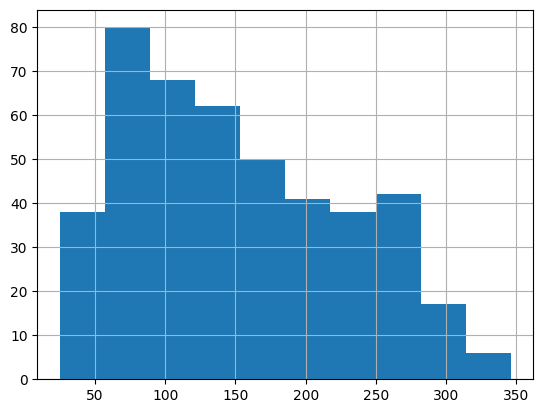

In [195]:
# Посмотрим на распределение целевого признака
y.hist();

In [196]:
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# Посмотрим на размерности выборок
print(f'Размерность обучающей выборки {X_train.shape}')
print(f'Размерность тестовой выборки {X_test.shape}')

Размерность обучающей выборки (296, 10)
Размерность тестовой выборки (146, 10)


## Бэггинг: случайный лес. 


In [197]:
# Создаем модель дерева решений с максимальной глубиной 10 
regr1 = DecisionTreeRegressor(max_depth=10, random_state=42)
# Обучаем модель
regr1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [198]:
# Создаем модель случайного леса из 10 деревьев с максимальной глубиной 10 для каждого дерева 
regr2 = RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)
# Обучаем модель
regr2.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)

In [199]:
# Формируем предсказания каждой из моделей
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)
 
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1),2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2),2)}')

Качество предсказания по MSE для решающего дерева 6132.51
Качество предсказания по MSE для случайного леса  3533.73


Задание 2.6

Одним из самых важных параметров, который непосредственно отвечает за переобучение и недообучение в деревьях, является глубина дерева. Предлагается используя код из модуля попытаться добиться недообучения для решающего дерева и случайного леса. Для этого:

Используя код из модуля, поставьте глубину деревьев в решающем дереве и случайном лесу, равную 2.

В качестве ответа приведите MSE решающего дерева и случайного леса (по модулю), округлённую до второго знака после запятой.

In [200]:
# Создаем модель дерева решений с максимальной глубиной 2 
regr3 = DecisionTreeRegressor(max_depth=2, random_state=42)
# Обучаем модель
regr3.fit(X_train, y_train)

# Создаем модель случайного леса из 2 деревьев с максимальной глубиной 10 для каждого дерева 
regr4 = RandomForestRegressor(max_depth=2, n_estimators=10, random_state=42)
# Обучаем модель
regr4.fit(X_train, y_train)

# Формируем предсказания каждой из моделей
y_pred1 = regr3.predict(X_test)
y_pred2 = regr4.predict(X_test)
 
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1),2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2),2)}')

Качество предсказания по MSE для решающего дерева 3432.45
Качество предсказания по MSE для случайного леса  3203.77


Задание 2.7

Известно, что при большой глубине деревья склонны к переобучению. В данном задании предлагается, используя код и прошлого задания, попытаться искусственно добиться переобучения модели решающего дерева и случайного леса.

Используя код из модуля, поставьте глубину деревьев в решающем дереве и случайном лесу, равную 1000.

В качестве ответа приведите MSE решающего дерева и случайного леса (по модулю), округлённую до второго знака после запятой.

In [201]:
# Создаем модель дерева решений с максимальной глубиной 1000 
regr5 = DecisionTreeRegressor(max_depth=1000, random_state=42)
# Обучаем модель
regr5.fit(X_train, y_train)

# Создаем модель случайного леса из 1000 деревьев с максимальной глубиной 10 для каждого дерева 
regr6 = RandomForestRegressor(max_depth=1000, n_estimators=10, random_state=42)
# Обучаем модель
regr6.fit(X_train, y_train)

# Формируем предсказания каждой из моделей
y_pred1 = regr5.predict(X_test)
y_pred2 = regr6.predict(X_test)
 
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1),2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2),2)}')

Качество предсказания по MSE для решающего дерева 6430.63
Качество предсказания по MSE для случайного леса  3549.09


 ## Стекинг

Стекинг для задачи регрессии имеет реализацию в библиотеке scikit-learn в классе StackingRegressor, для задачи классификации — в классе StackingClassifier. На вход подаётся список базовых моделей (атрибут estimators) и метамодель (атрибут final_estimator).

Примечание. Стоит понимать, что для задачи регрессии все базовые модели должны быть регрессорами, а для задачи классификации — классификаторами.  

Попробуем на практике применить стекинг, используя реализацию из библиотеки sklearn. В качестве входных данных будем использовать данные про диабет, использованные ранее. Обратимся снова к коду и обучим модель на данных.

Как и все ансамбли, модель стекинга находится в модуле ensemble.

In [202]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

Основные параметры StackingRegressor:

- estimators — список из кортежей базовых моделей в виде (str, model). Первым элементом в каждом кортеже идет строка с именем модели, вторым — собственно сама модель.
- final_estimator — метамодель.
- cv — количество фолдов, на которые делится выборка. По умолчанию используется пять фолдов.

 Будем строить стекинг на следующих моделях:

- 'dt' — дерево решений;
- 'lr' — ридж-регрессия, линейная модель регрессии с L2-регуляризацией;
- случайный лес с количеством деревьев, равным 10, в качестве метамодели.

In [203]:
# Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt',  DecisionTreeRegressor(random_state=42))
]

# Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)
# Обучаем модель
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', RidgeCV()),
                              ('dt', DecisionTreeRegressor(random_state=42))],
                  final_estimator=RandomForestRegressor(n_estimators=10,
                                                        random_state=42))

In [204]:
# Формируем предсказание для тестовой выборки
y_pred_stack = reg.predict(X_test)
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack), 2)}')

Качество предсказания по MSE для стекинга 3467.74


Посмотреть на метапризнаки можно с помощью метода transform(). Для этого в метод нужно передать матрицу наблюдений X. В результате вызова метода для всех объектов каждая из двух моделей сделает предсказание вероятностей и вернёт матрицу из двух столбцов. Оформим её в виде DataFrame:

In [205]:
# Получаем мета-признаки из тренировочных данных
meta_data = reg.transform(X_train)
# Создаем DataFrame
meta_df = pd.DataFrame(
    meta_data, #содержимое таблицы
    columns=['meta_feature1', 'meta_feature2',] #название столбцов
)
meta_df.head()

,meta_feature1,meta_feature2
0,152.477333,154.0
1,202.022338,192.0
2,133.718464,116.0
3,146.698345,81.0
4,169.783292,122.0


Примечание. При желании к метапризнакам можно добавить столбцы из изначального набора данных и попробовать обучить модель на этом наборе данных.

Задание 3.5

Для выполнения задания используйте набор данных о диабете, который представлен в ноутбуке с примерами.

Постройте стекинг из следующих базовых моделей:

Ридж-регрессия (RidgeCV());
Линейная регрессия.
В качестве метамодели используйте случайный лес с количеством деревьев 100, максимальной глубиной 10, все параметры для базовых моделей стандартные. Для всех алгоритмов параметр random_state=42.

Сделайте предсказание целевой метрики для тестового набора данных. Рассчитайте метрику MSE для набора данных и запишите её в качестве ответа с точностью до одного знака после запятой.

In [206]:
from sklearn.linear_model import LinearRegression
# Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('rr', RidgeCV()),
    ('lr', LinearRegression())
]

# Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=100,
                                          max_depth=10,
                                          random_state=42)
)
# Обучаем модель
reg.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
y_pred_stack = reg.predict(X_test)
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack), 2)}')

Качество предсказания по MSE для стекинга 3534.69


 ## Бустинг
 



### Адаптивный бустинг

In [207]:
from sklearn.ensemble import AdaBoostRegressor

# Создаем объект класса дерева решений
dt = DecisionTreeRegressor(
    max_depth=3, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
# Создаем объект класса AdaBoost
ada = AdaBoostRegressor(
    estimator=dt, #базовая модель
    n_estimators=10, #количество моделей в ансамбле
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
ada.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
ada_pred  = ada.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred),2)}')


Качество предсказания по MSE для AdaBoost 3040.83


Задание 4.1

Измените количество базовых моделей до 50 и 100. В качестве ответа приведите полученные результаты, округленные до второго знака после запятой. Остальные параметры оставьте неизменными.

In [208]:
# Создаем объект класса дерева решений
dt = DecisionTreeRegressor(
    max_depth=3, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
# Создаем объект класса AdaBoost
ada50 = AdaBoostRegressor(
    estimator=dt, #базовая модель
    n_estimators=100, #количество моделей в ансамбле
    random_state=42 #датчик генератора случайных чисел
)

# Создаем объект класса AdaBoost
ada100 = AdaBoostRegressor(
    estimator=dt, #базовая модель
    n_estimators=100, #количество моделей в ансамбле
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
ada50.fit(X_train, y_train)
ada100.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
ada_pred50  = ada50.predict(X_test)
ada_pred100  = ada100.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для AdaBoost 50: {round(mean_squared_error(y_test, ada_pred50),2)}')
print(f'Качество предсказания по MSE для AdaBoost 100: {round(mean_squared_error(y_test, ada_pred100),2)}')

Качество предсказания по MSE для AdaBoost 50: 3101.68
Качество предсказания по MSE для AdaBoost 100: 3101.68


### Градиентный бустинг (регрессия)

Как и все ансамбли, градиентный бустинг находится в модуле ensemble библиотеки sklearn. В качестве входных данных продолжим использовать данные о диабете.

 Градиентный бустинг над деревьями для решения задачи регрессии реализован в классе GradientBoostingRegressor. Для задачи классификации данный метод реализован в классе GradientBoostingClassifier. Параметры у классов схожи, различия только в функции потерь. Поэтому мы можем рассмотреть параметры GradientBoostingRegressor, подразумевая, что у классификатора они идентичны.

Основные параметры GradientBoostingRegressor:

- loss — функция потерь. По умолчанию в регрессии 'squared_loss' - наша любимая MSE, а в классификации 'log_loss' - логистическая функция потерь.
- learning_rate — темп обучения. По умолчанию 0.1. 
n_estimators — количество деревьев в бустинге (число  из бустинга). По умолчанию равно 100.
- max_depth — максимальная глубина одного дерева. По умолчанию равна 3 — строятся короткие деревья с большим смещением.
- min_samples_leaf — минимальное число объектов в листе. По умолчанию 1.
- random_state — число, отвечающее за генерацию случайных чисел.

In [209]:
from sklearn.ensemble import GradientBoostingRegressor

# Создаем объект класса градиентный бустинг
gb = GradientBoostingRegressor(
    max_depth=3, #максимальная глубина дерева
    n_estimators=10, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)

# Обучаем модель
gb.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
gb_pred  = gb.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для GradientBoostingRegressor {round(mean_squared_error(y_test, gb_pred),2)}')

Качество предсказания по MSE для GradientBoostingRegressor 3477.3


Задание 4.5

Измените количество базовых моделей с 10 до 50 и 100. В качестве ответа приведите полученные результаты, округленные до второго знака после запятой. Если второе число после запятой равно нулю, округлите до одного знака: например 10.10 необходимо округлить до 10.1. Остальные параметры оставьте неизменными.

In [210]:
# Создаем объект класса градиентный бустинг
gb2 = GradientBoostingRegressor(
    max_depth=3, #максимальная глубина дерева
    n_estimators=50, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)
gb3 = GradientBoostingRegressor(
    max_depth=3, #максимальная глубина дерева
    n_estimators=100, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)

# Обучаем модель
gb2.fit(X_train, y_train)
gb3.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
gb_pred2  = gb2.predict(X_test)
gb_pred3  = gb3.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для GradientBoostingRegressor 50: {round(mean_squared_error(y_test, gb_pred2),2)}')
print(f'Качество предсказания по MSE для GradientBoostingRegressor 100: {round(mean_squared_error(y_test, gb_pred3),2)}')

Качество предсказания по MSE для GradientBoostingRegressor 50: 3100.08
Качество предсказания по MSE для GradientBoostingRegressor 100: 3286.02


### Градиентный бустинг (классификация)

✍️ Попробуем решить задачу бинарной классификации с помощью градиентного бустинга. Для этого возьмём датасет качества вина. В качестве целевой метки будем считать качественным вино, рейтинг которого больше пяти.

In [211]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [212]:
# Читаем исходные данные к задаче классификации
df = pd.read_csv('data/winequality-red.csv', sep = ';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Как и договаривались ранее, хорошим вином будем считать все, имеющие значение признака quality больше 5:

In [213]:
# Создаем матрицу наблюдений 
X = df.drop(['quality'],axis = 1)
# Создаем вектор признаков для бинарной классификации
y = (df['quality'] >5).astype(int)

In [214]:
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
# Посмотрим на размерности выборок
print(f' Размерность обучающей выборки {X_train.shape}')
print(f' Размерность тестовой выборки {X_test.shape}')

 Размерность обучающей выборки (1071, 11)
 Размерность тестовой выборки (528, 11)


Инициализируем модель градиентного бустинга:

In [215]:
# Создаем модель градиентного бустинга
gb = GradientBoostingClassifier(
    loss='log_loss', #функция потерь
    learning_rate=0.1, #темп обучения
    n_estimators=100, #число деревьев
    max_depth=3, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
# Обучаем модель
gb.fit(X_train, y_train)
# Формируем предсказание для тестовой выборки
y_pred = gb.predict(X_test)
# Посмотрим на основные метрики классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       238
           1       0.81      0.80      0.81       290

    accuracy                           0.79       528
   macro avg       0.79      0.79      0.79       528
weighted avg       0.79      0.79      0.79       528



Аналогично другим классификаторам в sklearn мы можем получать оценки вероятностей для каждого класса с помощью метода predict_proba(). Можете использовать эту возможность, например, для подбора оптимального порога вероятности, как мы делали это в предыдущих модулях.

In [216]:
# Прогнозируем вероятности принадлежности к классам
y_pred_proba = gb.predict_proba(X_test)
print(y_pred_proba)

[[0.7575177  0.2424823 ]
 [0.81931477 0.18068523]
 [0.80325657 0.19674343]
 ...
 [0.0212709  0.9787291 ]
 [0.90355559 0.09644441]
 [0.80946194 0.19053806]]


Известно, что с уменьшением темпа обучения (learning_rate) возникает необходимость повышения количества базовых моделей, то есть существует некоторая дилемма (trade-off) между темпом обучения и количеством моделей (n_estimators). Посмотрим на практике, как эти параметры связаны между собой. 

Задание 4.6

Обучите на тренировочной выборке (X_train, y_train) модель градиентного бустинга, состоящего из 200 деревьев, максимальная глубина каждого из которых равна 3. Минимальное число объектов в листе — 10. Темп обучения возьмите равный 0.01. Параметр random_state установите в значение 42.


Сделайте предсказание качества вина для тренировочного и тестового набора данных. Рассчитайте метрику accuracy для тестового набора (X_test, y_test) и запишите её в качестве ответа с точностью до двух знаков после запятой.

In [217]:
# Создаем модель градиентного бустинга
gb1 = GradientBoostingClassifier(
    loss='log_loss', #функция потерь
    learning_rate=0.01, #темп обучения
    n_estimators=200, #число деревьев
    max_depth=3, #максимальная глубина дерева
    min_samples_leaf=10, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел
)
# Обучаем модель
gb1.fit(X_train, y_train)
# Формируем предсказание для тестовой выборки
y_pred1 = gb1.predict(X_test)
# Посмотрим на основные метрики классификации
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       238
           1       0.77      0.73      0.75       290

    accuracy                           0.73       528
   macro avg       0.73      0.73      0.73       528
weighted avg       0.73      0.73      0.73       528



Задание 4.7

Увеличьте количество деревьев до 500, остальные параметры оставьте прежними.


Сделайте предсказание качества вина для тренировочного и тестового набора данных. Рассчитайте метрику accuracy для тестового набора (X_test, y_test) и запишите её в качестве ответа с точностью до двух знаков после запятой.

In [218]:
# Создаем модель градиентного бустинга
gb2 = GradientBoostingClassifier(
    loss='log_loss', #функция потерь
    learning_rate=0.01, #темп обучения
    n_estimators=500, #число деревьев
    max_depth=3, #максимальная глубина дерева
    min_samples_leaf=10, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел
)
# Обучаем модель
gb2.fit(X_train, y_train)
# Формируем предсказание для тестовой выборки
y_pred2 = gb2.predict(X_test)
# Посмотрим на основные метрики классификации
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       238
           1       0.79      0.76      0.77       290

    accuracy                           0.75       528
   macro avg       0.75      0.75      0.75       528
weighted avg       0.76      0.75      0.75       528



Задание 4.8

Увеличьте learning rate до 0.2.

Сделайте предсказание качества вина для тренировочного и тестового набора данных. Рассчитайте метрику accuracy для тестового набора (X_test, y_test) и запишите её в качестве ответа с точностью до двух знаков после запятой.

In [221]:
# Создаем модель градиентного бустинга
gb3 = GradientBoostingClassifier(
    loss='log_loss', #функция потерь
    learning_rate=0.02, #темп обучения
    n_estimators=500, #число деревьев
    max_depth=3, #максимальная глубина дерева
    min_samples_leaf=10, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел
)
# Обучаем модель
gb3.fit(X_train, y_train)
# Формируем предсказание для тестовой выборки
y_pred3 = gb3.predict(X_test)
# Посмотрим на основные метрики классификации
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       238
           1       0.81      0.79      0.80       290

    accuracy                           0.78       528
   macro avg       0.78      0.78      0.78       528
weighted avg       0.78      0.78      0.78       528

